# Table of content
1. [CSV File Input-Output](#CSV File Input-Output)
2. [Overview of dataframe](#Overview of dataframe)
3. [Iterate through DataFrame](#Iterate through DataFrame)
4. [Plot histogram](#Plot histogram)

In [1]:
import pandas as pd

# CSV File Input-Output

Sample data from [Dataset Publishing Language](https://developers.google.com/public-data/docs/canonical/countries_csv). Copy them into a Calc sheet (Linux) or Excel (Windows) and save the file as CSV format. 

### [Read CSV](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)
Important parameters
* __sep__: Delimiter, separator
* __header__: Row number(s) to use as the column names, and the start of the data. First row = 0. 
* __names__: List of column names to use. If file contains no header row, then you should explicitly pass header=None 

In [2]:
df = pd.read_csv(filepath_or_buffer='countries.csv',
                 header=1,  
                 sep=',', 
                 na_values = '',  # To avoild default read setting that convert 'NA' to nan.
                 keep_default_na = False,
                 )
df.head(5)

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


### Overview information about the DataFrame (richer info than df.dtypes)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 4 columns):
country      245 non-null object
latitude     244 non-null float64
longitude    244 non-null float64
name         245 non-null object
dtypes: float64(2), object(2)
memory usage: 7.7+ KB


In [4]:
df.head()

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla


In [5]:
df[df["longitude"].isnull()]

,country,latitude,longitude,name
226,UM,NaN,NaN,U.S. Minor Outlying Islands


In [6]:
for lat in df['latitude']:
    try:
        float(lat)
    except:
        print("Error", lat, type(lat), len(lat))

* An interesting observation is any string `NA` would be default read as NaN ([Python Reference](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html)). To see the difference, remove the `na_values` setting above and we will see the value NA in row 156 is converted to `nan`. 

In [7]:
df.iloc[156]

country           NA
latitude    -22.9576
longitude    18.4904
name         Namibia
Name: 156, dtype: object

### [Write to CSV](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html)
Important parameters
* __index__: Default = True. Set to False if index is not needed as a separate column. 

In [8]:
df.to_csv(path_or_buf='countries_copy.csv', 
          index=False)

# Iterate through DataFrame 
by [_itertuples()_](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.itertuples.html)

In [9]:
for row in df.head(2).itertuples():
    print(row.country, row.name)

AD Andorra
AE United Arab Emirates


# Overview of dataframe 
* __head__ and __tail__

In [10]:
df.head(2)

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates


In [11]:
df.tail(2)

,country,latitude,longitude,name
243,ZM,-13.133897,27.849332,Zambia
244,ZW,-19.015438,29.154857,Zimbabwe


* Describe numeric fields (in this case doesn't make much sense to average latitude)

In [12]:
df.describe()

,latitude,longitude
count,244.000000,244.000000
mean,16.253109,13.294814
std,27.031206,73.976477
min,-75.250973,-177.156097
25%,-0.301710,-38.092008
50%,16.869235,18.182149
75%,38.965238,49.046734
max,77.553604,179.414413


In [13]:
df.dtypes

country       object
latitude     float64
longitude    float64
name          object
dtype: object

# [Plot histogram](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113a8b208>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x113b109b0>]], dtype=object)

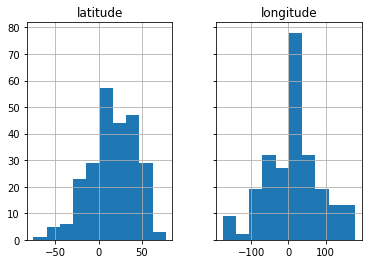

In [14]:
%matplotlib inline
df.hist(column=['latitude', 'longitude'], 
       sharey=True,
       bins= 10,
       )

Some observations from the plot
* More countries in northern hemisphere (latitude > 0) than in southern spheres
* Many more countries are close to 0 longitude (Greenwich zone) (Europe, Africa, ...)

# Lambda function on multiple columns
[StackOverflow](https://stackoverflow.com/questions/16353729/pandas-how-to-use-apply-function-to-multiple-columns)

In [15]:
combine = lambda row: (row['latitude'], row['longitude'])
df['coordinate'] = df.apply(combine, axis=1)
df.head(2)

,country,latitude,longitude,name,coordinate
0,AD,42.546245,1.601554,Andorra,"(42.546245, 1.6015540000000001)"
1,AE,23.424076,53.847818,United Arab Emirates,"(23.424076, 53.847818000000004)"


# Making a dictionary from 2 rows in DataFrame

In [16]:
pd.Series(df['name'].values, index=df['country']).to_dict()

{'AD': 'Andorra',
 'AE': 'United Arab Emirates',
 'AF': 'Afghanistan',
 'AG': 'Antigua and Barbuda',
 'AI': 'Anguilla',
 'AL': 'Albania',
 'AM': 'Armenia',
 'AN': 'Netherlands Antilles',
 'AO': 'Angola',
 'AQ': 'Antarctica',
 'AR': 'Argentina',
 'AS': 'American Samoa',
 'AT': 'Austria',
 'AU': 'Australia',
 'AW': 'Aruba',
 'AZ': 'Azerbaijan',
 'BA': 'Bosnia and Herzegovina',
 'BB': 'Barbados',
 'BD': 'Bangladesh',
 'BE': 'Belgium',
 'BF': 'Burkina Faso',
 'BG': 'Bulgaria',
 'BH': 'Bahrain',
 'BI': 'Burundi',
 'BJ': 'Benin',
 'BM': 'Bermuda',
 'BN': 'Brunei',
 'BO': 'Bolivia',
 'BR': 'Brazil',
 'BS': 'Bahamas',
 'BT': 'Bhutan',
 'BV': 'Bouvet Island',
 'BW': 'Botswana',
 'BY': 'Belarus',
 'BZ': 'Belize',
 'CA': 'Canada',
 'CC': 'Cocos [Keeling] Islands',
 'CD': 'Congo [DRC]',
 'CF': 'Central African Republic',
 'CG': 'Congo [Republic]',
 'CH': 'Switzerland',
 'CI': "Côte d'Ivoire",
 'CK': 'Cook Islands',
 'CL': 'Chile',
 'CM': 'Cameroon',
 'CN': 'China',
 'CO': 'Colombia',
 'CR': 'Costa

# Merge 2 or more DataFrame

In [17]:
a = df.head(2)
b = df.tail(2)
pd.concat([a, b], axis=0)

,country,latitude,longitude,name,coordinate
0,AD,42.546245,1.601554,Andorra,"(42.546245, 1.6015540000000001)"
1,AE,23.424076,53.847818,United Arab Emirates,"(23.424076, 53.847818000000004)"
243,ZM,-13.133897,27.849332,Zambia,"(-13.133897, 27.849332)"
244,ZW,-19.015438,29.154857,Zimbabwe,"(-19.015438, 29.154857)"
